This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset (IMDB = Internet Movie Database)

**Loading the IMDB dataset**

You’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
reviews for testing, each set consisting of 50% negative and 50% positive reviews.

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

The argument ``num_words=10000`` means you’ll only keep the top 10,000 most frequently
occurring words in the training data. Rare words will be discarded. This allows
us to work with vector data of manageable size. If we didn’t set this limit, we’d be working
with 88,585 unique words in the training data, which is unnecessarily large. Many
of these words only occur in a single sample, and thus can’t be meaningfully used for
classification.

In [2]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [3]:
len(train_data[0])

218

In [4]:
train_labels[0]

1

**Ajout DC : liste en compréhension**

Les listes en compréhension autorisent une syntaxe allégée pour la création de listes.

Pour plus d'informations sur les listes en compréhension, voir : https://fr.wikipedia.org/wiki/Liste_en_compréhension
Sur les listes en compréhension avec Python voir https://gayerie.dev/docs/python/python3/list_comprehension.html

In [5]:
[i**2 for i in range(5)]

[0, 1, 4, 9, 16]

In [6]:
[i**2 for i in range(5) if i % 2 == 0]

[0, 4, 16]

**Fin ajout DC**

In [7]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

*Note that the indices are offset by 3 because 0, 1 and 2 are reserved indices for "padding", "start of sequence" and "unknown".*

In [9]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

*Ajout DC*

In [10]:
type(word_index)

dict

In [11]:
len(word_index)

88584

In [12]:
test_word_index = { "bonjour": 3, "au": 7, "revoir": 12}
reverse_test_word_index = dict(
    [(value, key) for (key, value) in test_word_index.items()])
reverse_test_word_index

{3: 'bonjour', 7: 'au', 12: 'revoir'}

In [13]:
[reverse_test_word_index.get(i, "inconnu") for i in [5, 7, 12, 2] ]

['inconnu', 'au', 'revoir', 'inconnu']

**Autre exemple : train_data\[2\]**

In [14]:
print(train_data[2])

[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4, 86, 320, 35, 534, 19, 263, 4821, 1301, 4, 1873, 33, 89, 78, 12, 66, 16, 4, 360, 7, 4, 58, 316, 334, 11, 4, 1716, 43, 645, 662, 8, 257, 85, 1200, 42, 1228, 2578, 83, 68, 3912, 15, 36, 165, 1539, 278, 36, 69, 2, 780, 8, 106, 14, 6905, 1338, 18, 6, 22, 12, 215, 28, 610, 40, 6, 87, 326, 23, 2300, 21, 23, 22, 12, 272, 40, 57, 31, 11, 4, 22, 47, 6, 2307, 51, 9, 170, 23, 595, 116, 595, 1352, 13, 191, 79, 638, 89, 2, 14, 9, 8, 106, 607, 624, 35, 534, 6, 227, 7, 129, 113]


In [15]:
len(train_data[2])

141

In [16]:
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[2]])
print(decoded_review)

? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life


In [17]:
train_labels[2]

0

*Fin ajout DC*

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

You can’t directly feed lists of integers into a neural network. They all have different
lengths, but a neural network expects to process contiguous batches of data. You have
to turn your lists into tensors.

* *Multi-hot encode* your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vector that would be all 0s except for indices 8 and 5, which would be 1s. Then you could use a ``Dense`` layer, capable of handling floating-point vector data, as the first layer in your model.

In [18]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [20]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [22]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5286 - accuracy: 0.7789 - val_loss: 0.4413 - val_accuracy: 0.8045
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3320 - accuracy: 0.8883 - val_loss: 0.3404 - val_accuracy: 0.8672
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2442 - accuracy: 0.9209 - val_loss: 0.2996 - val_accuracy: 0.8835
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1984 - accuracy: 0.9344 - val_loss: 0.3020 - val_accuracy: 0.8767
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1650 - accuracy: 0.9468 - val_loss: 0.3146 - val_accuracy: 0.8749
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1396 - accuracy: 0.9563 - val_loss: 0.2846 - val_accuracy: 0.8868
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1191 - accuracy: 0.9646 - val_loss: 0.2955 - val_accuracy: 0.8862
Epoch 8/20
30

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

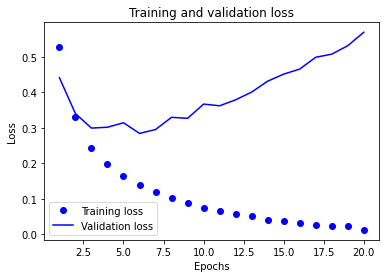

In [26]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

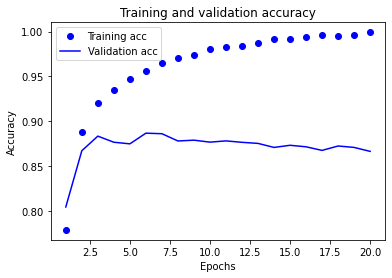

In [27]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [28]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4466 - accuracy: 0.8135
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2627 - accuracy: 0.9049
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2090 - accuracy: 0.9253
Epoch 4/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1784 - accuracy: 0.9364


In [29]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2881 - accuracy: 0.8861


In [30]:
results

[0.2881249189376831, 0.8861200213432312]

### Using a trained model to generate predictions on new data

In [31]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.20049098],
       [0.9998545 ],
       [0.767009  ],
       ...,
       [0.1254756 ],
       [0.0661254 ],
       [0.66609424]], dtype=float32)

### Further experiments

### Wrapping up

Here’s what you should take away from this example:
- You usually need to do quite a bit of preprocessing on your raw data in order to
be able to feed it—as tensors—into a neural network. Sequences of words can
be encoded as binary vectors, but there are other encoding options too.
- Stacks of ``Dense`` layers with ``relu`` activations can solve a wide range of problems
(including sentiment classification), and you’ll likely use them frequently.
- In a binary classification problem (two output classes), your model should end
with a ``Dense`` layer with one unit and a ``sigmoid`` activation: the output of your
model should be a scalar between 0 and 1, encoding a probability.
- With such a scalar sigmoid output on a binary classification problem, the loss
function you should use is ``binary_crossentropy``.
- The ``rmsprop`` optimizer is generally a good enough choice, whatever your problem.
That’s one less thing for you to worry about.
- As they get better on their training data, neural networks eventually start overfitting
and end up obtaining increasingly worse results on data they’ve never
seen before. Be sure to always monitor performance on data that is outside of
the training set.

## Classifying newswires: A multiclass classification example

In the previous section, you saw how to classify vector inputs into two mutually exclusive
classes using a densely connected neural network. But what happens when you
have more than two classes?

In this section, we’ll build a model to classify Reuters newswires into 46 mutually
exclusive topics. Because we have many classes, this problem is an instance of *multiclass
classification*, and because each data point should be classified into only one category,
the problem is more specifically an instance of *single-label multiclass classification*.
If each data point could belong to multiple categories (in this case, topics), we’d be
facing a *multilabel multiclass classification* problem.

### The Reuters dataset

You’ll work with the *Reuters dataset*, a set of short newswires and their topics, published
by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There
are 46 different topics; some topics are more represented than others, but each topic
has at least 10 examples in the training set.

Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras. Let’s
take a look.

**Loading the Reuters dataset**

In [32]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

As with the IMDB dataset, the argument ``num_words=10000`` restricts the data to the
10,000 most frequently occurring words found in the data.

You have 8,982 training examples and 2,246 test examples:

In [33]:
len(train_data)

8982

In [34]:
len(test_data)

2246

In [35]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [36]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[6000]])
decoded_newswire

'? tunisia is expected to tender shortly for 100 000 tonnes of soft wheat for shipment between april and june covered by ? export credits trade sources said over 300 000 tonnes of french soft wheat have been sold to tunisia since the beginning of the 1986 87 campaign of which 225 000 to 250 000 tonnes have already been shipped they said reuter 3'

In [37]:
train_labels[6000]

1

### Preparing the data

You can vectorize the data with the exact same code as in the previous example.

**Encoding the input data**

In [38]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

To vectorize the labels, there are two possibilities: you can cast the label list as an integer
tensor, or you can use *one-hot encoding*. One-hot encoding is a widely used format
for categorical data, also called *categorical encoding*. In this case, one-hot encoding of
the labels consists of embedding each label as an all-zero vector with a 1 in the place of
the label index. The following listing shows an example.

**Encoding the labels**

In [39]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

Note that there is a built-in way to do this in Keras:

Ajout DC : la fonction ``to_categorical()`` permet de faire directement le *one-hot encoding*.

In [40]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [41]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [42]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [43]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [44]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 34ms/step - loss: 2.8745 - accuracy: 0.4385 - val_loss: 1.9592 - val_accuracy: 0.6030
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.6105 - accuracy: 0.6673 - val_loss: 1.4203 - val_accuracy: 0.6860
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.2003 - accuracy: 0.7399 - val_loss: 1.1952 - val_accuracy: 0.7370
Epoch 4/20
16/16 [==============================] - 0s 22ms/step - loss: 0.9731 - accuracy: 0.7930 - val_loss: 1.0754 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 0s 23ms/step - loss: 0.8053 - accuracy: 0.8307 - val_loss: 1.0226 - val_accuracy: 0.7790
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6744 - accuracy: 0.8566 - val_loss: 0.9714 - val_accuracy: 0.7830
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5690 - accuracy: 0.8787 - val_loss: 0.9109 - val_accuracy: 0.8140
Epoch 8/20
16

**Plotting the training and validation loss**

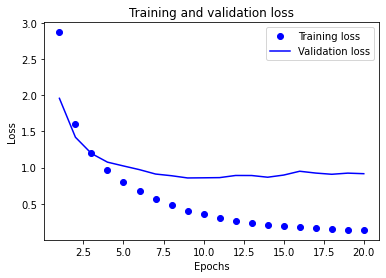

In [45]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

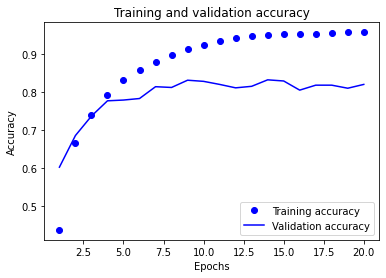

In [46]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [47]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

Epoch 1/9
18/18 [==============================] - 1s 18ms/step - loss: 2.6839 - accuracy: 0.5451
Epoch 2/9
18/18 [==============================] - 0s 17ms/step - loss: 1.5026 - accuracy: 0.6900
Epoch 3/9
18/18 [==============================] - 0s 18ms/step - loss: 1.1351 - accuracy: 0.7497
Epoch 4/9
18/18 [==============================] - 0s 18ms/step - loss: 0.9168 - accuracy: 0.8013
Epoch 5/9
18/18 [==============================] - 0s 20ms/step - loss: 0.7600 - accuracy: 0.8365
Epoch 6/9
18/18 [==============================] - 0s 20ms/step - loss: 0.6293 - accuracy: 0.8703
Epoch 7/9
18/18 [==============================] - 0s 19ms/step - loss: 0.5286 - accuracy: 0.8904
Epoch 8/9
18/18 [==============================] - 0s 18ms/step - loss: 0.4421 - accuracy: 0.9083
Epoch 9/9
18/18 [==============================] - 0s 16ms/step - loss: 0.3755 - accuracy: 0.9216


In [48]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 0.9223 - accuracy: 0.7996


In [49]:
results

[0.9222695827484131, 0.7996438145637512]

This approach reaches an accuracy of ~80%. With a balanced binary classification
problem, the accuracy reached by a purely random classifier would be 50%. But in
this case, we have 46 classes, and they may not be equally represented. What would be
the accuracy of a random baseline? We could try quickly implementing one to check
this empirically:

In [50]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18967052537845058

As you can see, a random classifier would score around 19% classification accuracy, so
the results of our model seem pretty good in that light.

Ajout DC : on constate que si les labels avaient été attribués de manière aléatoire, on aurait une exactitude d'envion 19%.

### Generating predictions on new data

In [51]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [52]:
predictions[0].shape

(46,)

In [53]:
np.sum(predictions[0])

1.0000001

In [54]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

We mentioned earlier that another way to encode the labels would be to cast them as
an integer tensor, like this:

In [55]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

The only thing this approach would change is the choice of the loss function. The loss
function ``categorical_crossentropy`` expects the labels to follow
a categorical encoding. With integer labels, you should use ``sparse_categorical_
crossentropy``:

In [56]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

This new loss function is still mathematically the same as ``categorical_crossentropy``;
it just has a different interface.

Ajout DC : c'est ce qu'on avait utilisé dans le chapitre 2 pour la reconnaissance des chiffres du dataset MNIST.

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [57]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 13ms/step - loss: 3.0619 - accuracy: 0.2701 - val_loss: 2.3678 - val_accuracy: 0.3560
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 2.0704 - accuracy: 0.4136 - val_loss: 1.8226 - val_accuracy: 0.5400
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 1.7099 - accuracy: 0.5650 - val_loss: 1.6395 - val_accuracy: 0.5750
Epoch 4/20
63/63 [==============================] - 1s 11ms/step - loss: 1.5575 - accuracy: 0.5851 - val_loss: 1.5947 - val_accuracy: 0.5880
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 1.4716 - accuracy: 0.5960 - val_loss: 1.5558 - val_accuracy: 0.5900
Epoch 6/20
63/63 [==============================] - 1s 10ms/step - loss: 1.4102 - accuracy: 0.6024 - val_loss: 1.5476 - val_accuracy: 0.5880
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 1.3639 - accuracy: 0.6056 - val_loss: 1.5554 - val_accuracy: 0.5920
Epoch 8/20
63/

The model now peaks at ~71% validation accuracy, an 8% absolute drop. This drop is
mostly due to the fact that we’re trying to compress a lot of information (enough
information to recover the separation hyperplanes of 46 classes) into an intermediate
space that is too low-dimensional. The model is able to cram *most* of the necessary
information into these four-dimensional representations, but not all of it.

### Further experiments

### Wrapping up 

Here’s what you should take away from this example:
- If you’re trying to classify data points among *N* classes, your model should end with a ``Dense`` layer of size *N*.
- In a single-label, multiclass classification problem, your model should end with a ``softmax`` activation so that it will output a probability distribution over the *N* output classes.
- Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the model and the true distribution of the targets.
- There are two ways to handle labels in multiclass classification:
    - Encoding the labels via categorical encoding (also known as one-hot encoding) and using ``categorical_crossentropy`` as a loss function   
    - Encoding the labels as integers and using the ``sparse_categorical_crossentropy`` loss function
- If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your model due to intermediate layers that are too small.

## Predicting house prices: A regression example

The two previous examples were considered classification problems, where the goal
was to predict a single discrete label of an input data point. Another common type of
machine learning problem is *regression*, which consists of predicting a continuous
value instead of a discrete label: for instance, predicting the temperature tomorrow,
given meteorological data or predicting the time that a software project will take to
complete, given its specifications.

**NOTE** Don’t confuse *regression* and the *logistic regression* algorithm. Confusingly,
logistic regression isn’t a regression algorithm—it’s a classification algorithm.

### The Boston Housing Price dataset

In this section, we’ll attempt to predict the median price of homes in a given Boston
suburb in the mid-1970s, given data points about the suburb at the time, such as the
crime rate, the local property tax rate, and so on. The dataset we’ll use has an interesting
difference from the two previous examples. It has relatively few data points: only
506, split between 404 training samples and 102 test samples. And each *feature* in the
input data (for example, the crime rate) has a different scale. For instance, some values
are proportions, which take values between 0 and 1, others take values between 1
and 12, others between 0 and 100, and so on.

**Loading the Boston housing dataset**

In [58]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [59]:
train_data.shape

(404, 13)

In [60]:
test_data.shape

(102, 13)

As you can see, we have 404 training samples and 102 test samples, each with 13
numerical features, such as per capita crime rate, average number of rooms per dwelling,
accessibility to highways, and so on.

The targets are the median values of owner-occupied homes, in thousands of dollars:

In [61]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

The prices are typically between $\$$10,000 and $\$$50,000. If that sounds cheap, remember
that this was the mid-1970s, and these prices aren’t adjusted for inflation.

### Preparing the data

It would be problematic to feed into a neural network values that all take wildly different
ranges. The model might be able to automatically adapt to such heterogeneous
data, but it would definitely make learning more difficult. A widespread best practice
for dealing with such data is to do feature-wise normalization: for each feature in the
input data (a column in the input data matrix), we subtract the mean of the feature
and divide by the standard deviation, so that the feature is centered around 0 and has
a unit standard deviation. This is easily done in NumPy.

**Normalizing the data**

In [62]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [63]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

The model ends with a single unit and no activation (it will be a linear layer). This is a
typical setup for scalar regression (a regression where you’re trying to predict a single
continuous value). Applying an activation function would constrain the range the output
can take; for instance, if you applied a ``sigmoid`` activation function to the last layer,
the model could only learn to predict values between 0 and 1. Here, because the last
layer is purely linear, the model is free to learn to predict values in any range.

Note that we compile the model with the ``mse`` loss function—*mean squared error*, the
square of the difference between the predictions and the targets. This is a widely used
loss function for regression problems.

We’re also monitoring a new metric during training: ``mae`` *mean absolute error* (MAE). It’s the
absolute value of the difference between the predictions and the targets. For instance, an
MAE of 0.5 on this problem would mean your predictions are off by $\$$500 on average.

### Validating your approach using K-fold validation

It consists of splitting the available data into *K* partitions (typically *K* = 4 or 5), instantiating
*K* identical models, and training each one on *K* – 1 partitions while evaluating
on the remaining partition. The validation score for the model used is then the average
of the *K* validation scores obtained. In terms of code, this is straightforward.

**K-fold validation**

In [64]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [65]:
all_scores

[1.8937745094299316, 2.6876027584075928, 2.378471612930298, 2.5163886547088623]

In [66]:
np.mean(all_scores)

2.369059383869171

**Saving the validation logs at each fold**

In [67]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [68]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

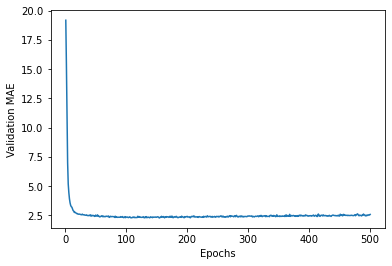

In [69]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

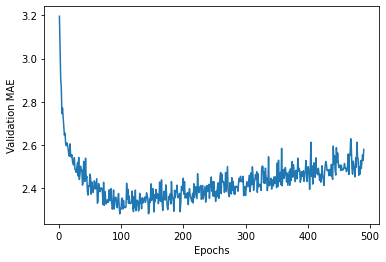

In [70]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [71]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 14.5430 - mae: 2.5773


In [72]:
test_mae_score

2.5772740840911865

### Generating predictions on new data

In [73]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 4ms/step


array([8.541317], dtype=float32)

### Wrapping up

Here’s what you should take away from this scalar regression example:
- Regression is done using different loss functions than we used for classification.
Mean squared error (MSE) is a loss function commonly used for regression.
- Similarly, evaluation metrics to be used for regression differ from those used for
classification; naturally, the concept of accuracy doesn’t apply for regression. A
common regression metric is mean absolute error (MAE).
-  When features in the input data have values in different ranges, each feature
should be scaled independently as a preprocessing step.
- When there is little data available, using K-fold validation is a great way to reliably
evaluate a model.
- When little training data is available, it’s preferable to use a small model with few
intermediate layers (typically only one or two), in order to avoid severe overfitting.

## Summary

- The three most common kinds of machine learning tasks on vector data are binary classification, multiclass classification, and scalar regression.
    - The “Wrapping up” sections earlier in the chapter summarize the important points you’ve learned regarding each task.
    - Regression uses different loss functions and different evaluation metrics than classification.
- You’ll usually need to preprocess raw data before feeding it into a neural network.
- When your data has features with different ranges, scale each feature independently
as part of preprocessing.
- As training progresses, neural networks eventually begin to overfit and obtain
worse results on never-before-seen data.
- If you don’t have much training data, use a small model with only one or two
intermediate layers, to avoid severe overfitting.
- If your data is divided into many categories, you may cause information bottlenecks
if you make the intermediate layers too small.
- When you’re working with little data, K-fold validation can help reliably evaluate
your model.